In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Define parameters for ranking programs with assigned weights
ranking_factors = {
    "Reputation": 0.2,
    "Faculty Quality": 0.15,
    "Industry Connections": 0.15,
    "Research Output": 0.15,
    "Tuition Fees": 0.1,
    "Flexibility": 0.1,
    "Student Reviews": 0.1,
    "Industry Job Placement": 0.2,
    "Alumni Network": 0.1
}

# Expanded list of universities
programs = [
    {"University": "Purdue University", "Program Name": "MS in Microelectronics & Semiconductors", "Reputation": 90, "Faculty Quality": 85, "Industry Connections": 88, "Research Output": 92, "Tuition Fees": 30000, "Flexibility": 75, "Student Reviews": 90, "Industry Job Placement": 88, "Alumni Network": 85},
    {"University": "Wayne State University", "Program Name": "MS in Semiconductor Engineering", "Reputation": 85, "Faculty Quality": 80, "Industry Connections": 83, "Research Output": 85, "Tuition Fees": 25000, "Flexibility": 80, "Student Reviews": 85, "Industry Job Placement": 82, "Alumni Network": 80},
    {"University": "Arizona State University", "Program Name": "Graduate Certificate in Semiconductor Processing", "Reputation": 80, "Faculty Quality": 78, "Industry Connections": 80, "Research Output": 75, "Tuition Fees": 20000, "Flexibility": 85, "Student Reviews": 82, "Industry Job Placement": 79, "Alumni Network": 77},
    {"University": "Northeastern University", "Program Name": "MS in Semiconductor Engineering", "Reputation": 88, "Faculty Quality": 87, "Industry Connections": 90, "Research Output": 89, "Tuition Fees": 32000, "Flexibility": 70, "Student Reviews": 88, "Industry Job Placement": 86, "Alumni Network": 88},
    {"University": "RIT", "Program Name": "MS in Microelectronic Engineering", "Reputation": 82, "Faculty Quality": 81, "Industry Connections": 85, "Research Output": 80, "Tuition Fees": 27000, "Flexibility": 75, "Student Reviews": 80, "Industry Job Placement": 84, "Alumni Network": 79},
    {"University": "Rensselaer Polytechnic Institute (RPI)", "Program Name": "Master in Semiconductor Technology (MaST)", "Reputation": 86, "Faculty Quality": 82, "Industry Connections": 87, "Research Output": 84, "Tuition Fees": 28000, "Flexibility": 78, "Student Reviews": 83, "Industry Job Placement": 85, "Alumni Network": 84},
    {"University": "Norfolk State University", "Program Name": "MS in Electronics Engineering - Microelectronics & Photonics", "Reputation": 79, "Faculty Quality": 76, "Industry Connections": 78, "Research Output": 77, "Tuition Fees": 22000, "Flexibility": 80, "Student Reviews": 79, "Industry Job Placement": 76, "Alumni Network": 75}
]


In [28]:
# Convert to DataFrame
df = pd.DataFrame(programs)

# Compute Overall Score using weighted average
df["Overall Score"] = sum(df[factor] * weight for factor, weight in ranking_factors.items())

# Rank programs based on Overall Score
df = df.sort_values(by="Overall Score", ascending=False)

# Display ranked programs
print("Top Semiconductor MSc Programs:")
print(df[["University", "Program Name", "Overall Score"]].head())

Top Semiconductor MSc Programs:
                               University  \
3                 Northeastern University   
0                       Purdue University   
5  Rensselaer Polytechnic Institute (RPI)   
4                                     RIT   
1                  Wayne State University   

                                Program Name  Overall Score  
3            MS in Semiconductor Engineering        3299.30  
0    MS in Microelectronics & Semiconductors        3100.35  
5  Master in Semiconductor Technology (MaST)        2896.65  
4          MS in Microelectronic Engineering        2793.50  
1            MS in Semiconductor Engineering        2595.10  


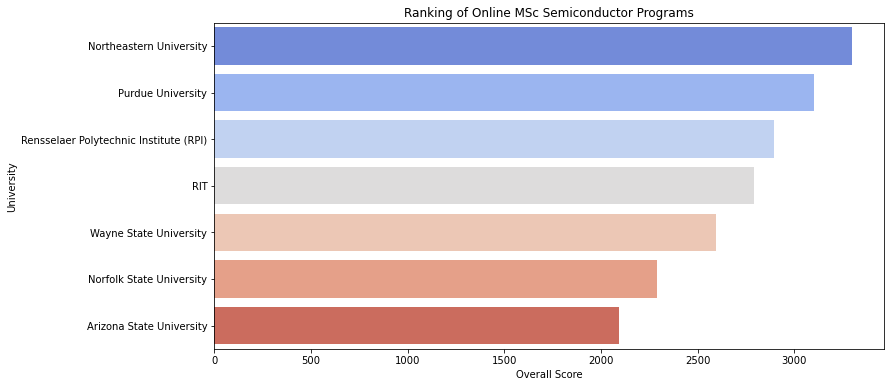

In [29]:
# Visualization of Rankings
plt.figure(figsize=(12, 6))
sns.barplot(y=df["University"], x=df["Overall Score"], palette="coolwarm")
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.title("Ranking of Online MSc Semiconductor Programs")
plt.show()

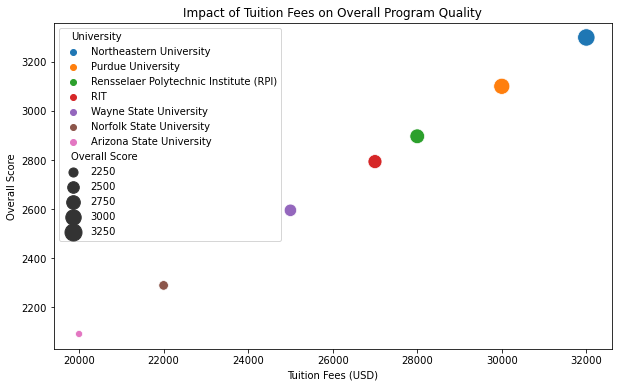

In [30]:
# Tuition Fees vs. Overall Score Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Tuition Fees"], y=df["Overall Score"], hue=df["University"], size=df["Overall Score"], sizes=(50, 300))
plt.xlabel("Tuition Fees (USD)")
plt.ylabel("Overall Score")
plt.title("Impact of Tuition Fees on Overall Program Quality")
plt.show()

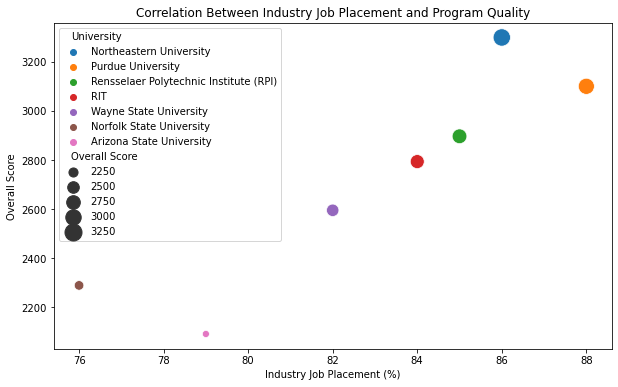

In [31]:
# Industry Job Placement vs. Overall Score Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Industry Job Placement"], y=df["Overall Score"], hue=df["University"], size=df["Overall Score"], sizes=(50, 300))
plt.xlabel("Industry Job Placement (%)")
plt.ylabel("Overall Score")
plt.title("Correlation Between Industry Job Placement and Program Quality")
plt.show()

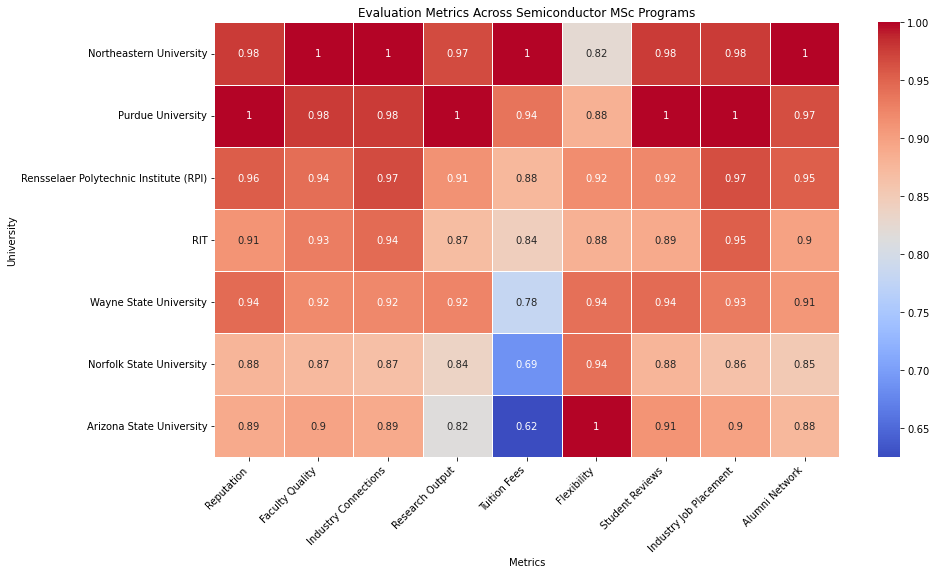

In [35]:
# Normalize values for better visualization
df_normalized = df.copy()
metrics = ["Reputation", "Faculty Quality", "Industry Connections", "Research Output", "Tuition Fees", "Flexibility", "Student Reviews", "Industry Job Placement", "Alumni Network"]
df_normalized[metrics] = df_normalized[metrics] / df_normalized[metrics].max()

# Visualization of All Results in a Single Graph
plt.figure(figsize=(14, 8))
sns.heatmap(df_normalized.set_index("University")[metrics], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Evaluation Metrics Across Semiconductor MSc Programs")
plt.xlabel("Metrics")
plt.ylabel("University")
plt.xticks(rotation=45, ha="right")
plt.show()

# Save ranked data
df.to_csv("semiconductor_msc_ranking_summary.csv", index=False)
